# Leanear Regression using Gradient Descent

As the name suggests we will discuss about linear regression using gradient descent. The aim of this discussion is to learn the basics of both linear regression and gradient descent and math used behind it thatswhy no machine learning library is used in the code. So lets get started with the Linear regression,
Linear regression is a basic and commonly used algorithm to estimate the relationship between dependent variable and one or more independent variables, those relations are linear (thats why the name linear regression) which is represented by the line. To represent the line we generally use the slope-intercept form whose equation is 

$y = mx + b$

where m is the slope of the line and b is the y-intercept of the line.

<img src="./Images/slope-intercept-form.png" />

here x is independent variable and y is the dependet variable.

Lets take an example of the gold prices which have been fairly linear in the year from 1970 to 2000 as seen in below graph.

<img src="./Images/only_gold.png" />

Based on the above datapoints, If we have to predict the gold value in 2005 then how would you predict it ? we can intuitively see that the relation is linear so we have to draw a line, so if roughly I imagine then I would draw a line something like,

<img src="./Images/Final_output.png"/>

So how does our intuition worked here ? well, I would say "I have drawn a line which is closest to all the points on the graph." Ok, using our intuition helped us here, but how to findout that nearly perfect line with using mathematics ? for that we have to know 2 things first is Error and the second is how to minimize the error. So lets talk about the first thing,
Error - 
Is the difference between our predicted output and expected output, sometimes it is referred as the loss and for calculating loss different methods can be used. We have used the sum of squared error whose equation is

<img src="./Images/SumOfSquare.png" />


    Yi means actual value
	m is the slope of the line
	b is the y intersept
	N is the number of the datapoints
    So If we plot the graph of slope, y-intersept with the error then the graph will look something like,

<img src="./Images/gradient_descent_error_surface.png" /> 

So we have to findout the value of the m and b where error is minimum. (thats what we did intuitively) 
But while solving the problem we can not calculate the value of the error for every m and b as it will take exponential time so for finding those optimum values we have used an algorithm named gradient descent. 
(For understanding this algorithm you need to understand the calculus so I suggest you watch the Essense of calculus series by 3blue1brown on youtube) 
This algorithm is based on the concept that if we take the derivative of a curve at a certain point then the value we get is the slope of the line which is tangent to that curve. The slope value is known as gradient. Then with the gradient we decide whether to increase or decrease the input value. but if you have more than 1 variable in your loss function then to calculate the gradient with respect to each variable use partial derivatives.
Here we have two variables in out equation one is m and second is b. So we need to calculate the gradient with respect to each of them with partial derivative which looks like,

<img src="./Images/sum_of_square_gradient.png" />

After calculating the gradients, update the values of the m and b. While updating if we subtract the values directly then our optimal values may miss so we need a multiplier, that multiplier is known as learning rate. we can define the learning rate as how much and how fast we are updating the values based on the gradient calculated. If the learning rate is too large then we may miss the optimal values of the m and b and if that is too small it will take much time to findout optimal values.

Now the essential part is done, lets move towards the code.

 b =  4.883462819066873  m =  146.503884572006
 predicted price is  5132.5194228392775


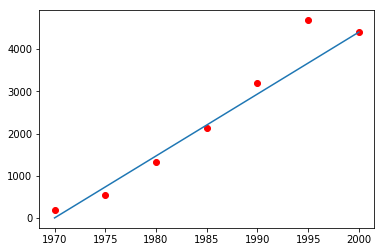

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#For plotiing the line on the graph
def plotLines(b,m,axs,xi):
    y = (np.array(np.array(xi)*m) + b)
    plt.plot(np.array(axs),y)
#For prediction of next price
def predict_next_price(b,m,x):
    return (x*m + b)
#Minimizing the loss using gradienct descent algorithm
def calculate_gradient_descent(x,y,learning_rate,iterations):
    b = 0 #initial value of Y intercept
    m = 0 #initial valur of slope of line
    for iter_no in range(iterations): #going through all the data points multiple times
        for i in range(len(x)):
            b_gradient = 0
            m_gradient = 0
            x_current = x[i]
            y_current = y[i]
            N = len(x)
            #formula for the partial derivative of error function with respect to b
            b_gradient += -(2/N) * (y_current - ((m * x_current)+b)) 
            #formula for the partial derivative of error function with respect to m
            m_gradient += -(2/N) * x_current * (y_current - ((m * x_current)+b))
        #updating the values
        b -= (learning_rate * b_gradient) 
        m -= (learning_rate * m_gradient)
    return [b,m]

def run():
    #reading from csv file
    year_price = pd.read_csv('GoldPricesIndia.csv')

    axs = np.array(year_price["year"])
    #plotting the datapoints
    plt.plot(axs,"price","ro",data=year_price)
    axs = np.array(axs) - 1970
    #no. of times we have to go through data points
    epochs = 1000

    #here x_point,y_point - co-ordinates of the points from the dataset
    #How fast the values should be updated
    learning_rate = 0.0001
    [b,m] = calculate_gradient_descent(np.array(axs), year_price["price"] ,learning_rate, epochs)
    print(" b = ",b," m = ",m)
    plotLines(b,m,np.array(axs)+1970,axs)
    #For prediction
    pred_year = 2005
    pred_price = predict_next_price(b,m,pred_year-1970)
    print(" predicted price is ",pred_price)

run()


Initially when we have given the value to m and b as zero then graph looks like this,

<img src="./Images/InitialStage.png" />

The orange line represents the line with 0 slope and 0 y-intercept. After which we have to update those values by calculating the gradients. So after the 1st iterationg over data points the gradients are,

$b gradient = -1257.142857142857$

$m gradient = -37714.28571428571$

As we discussed we have to subtract the gradient values from the original values. you can understand the importance of the learning rate here if we directly subtract the gradients then our updated values will be far more than values which we are trying to optimize, and we will miss the optimal values by far margin. So while updating those values we will multiply the gradients with learning rate and then subtract from original values. So after 1st iteration our new values of b and m are,

$b = 0.12571428571428572$

$m = 3.7714285714285714$

and our line looks like,

<img src="./Images/after1.png" />

By observing the line you can say that we have taken a small step in right direction, so after 50iterations our graph is,

<img src="./Images/after50.png" />

During those steps gradients will gradually decrese and eventually reaches close to zero, So we will stop when gradient approaches to zero or no. of epochs have reached.

<img src="./Images/afterAllIteration.png" />

To predict the values now, we will use the equation y = mx + b where b and m will be final value given by gradient descent function.

To sum it all,
Linear regression is used to estimate the relation between a dependent variable with one or more independent variables.
Error function gives us the difference between actual values and values predicted by our model
To minimize the error we have used gradient descent algorithm.